In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from math import log

In [2]:
df = pd.read_csv("TXF 1 分鐘.txt", sep = ",", encoding = "utf-8", engine = "c")

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df_count = df.groupby(["<Date>"]).count().reset_index()

In [5]:
df_count[(df_count["<Time>"].isin([300, 285]) == False) & (pd.to_datetime(df_count["<Date>"]) > pd.to_datetime("2011/12/31"))] 
# 300 -> 正常情況下 / 285 -> 換月情況下13:30收盤

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>
3240,2013/10/16,284,284,284,284,284,284
3291,2013/12/25,298,298,298,298,298,298
3398,2013/7/12,295,295,295,295,295,295
3588,2014/4/21,299,299,299,299,299,299
4340,2017/5/3,299,299,299,299,299,299
4621,2018/7/19,299,299,299,299,299,299
4852,2019/6/28,221,221,221,221,221,221
4918,2019/9/6,298,298,298,298,298,298


In [6]:
# df[df["<Date>"] == "2019/9/6"]["<Time>"].tolist() # 12:07沒資料

In [7]:
df[df["<Date>"] == "2019/6/28"]

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>
1398758,2019/6/28,08:46:00,10621,10623,10613,10618,1320
1398759,2019/6/28,08:47:00,10619,10622,10618,10619,329
1398760,2019/6/28,08:48:00,10619,10620,10617,10618,154
1398761,2019/6/28,08:49:00,10618,10620,10616,10616,315
1398762,2019/6/28,08:50:00,10616,10618,10615,10616,202
...,...,...,...,...,...,...,...
1398974,2019/6/28,12:22:00,10578,10578,10577,10577,37
1398975,2019/6/28,12:23:00,10576,10577,10575,10575,124
1398976,2019/6/28,12:24:00,10575,10576,10574,10574,30
1398977,2019/6/28,12:25:00,10575,10576,10574,10575,106


In [8]:
df["<Date>"] = pd.to_datetime(df["<Date>"])
df_2012_1min = df[df["<Date>"] > pd.to_datetime("2011/12/31")].copy()

In [9]:
df_2012_1min_copy = df_2012_1min.copy()
df_2012_1min_copy.set_axis(df_2012_1min_copy["<Date>"] + pd.to_timedelta(df_2012_1min_copy["<Time>"]), inplace = True)
df_2012_1min_copy.drop(columns = ["<Date>", "<Time>"], inplace = True)
df_2012_daily = df_2012_1min_copy.resample("B").agg(dict(zip(df_2012_1min_copy.columns, ["first", "max", "min", "last", "sum"])))
df_2012_daily = df_2012_daily[df_2012_daily["<Open>"].isna() == False].copy()
df_2012_daily

,<Open>,<High>,<Low>,<Close>,<Volume>
2012-01-02,7022.0,7051.0,6928.0,6949.0,88074
2012-01-03,7020.0,7087.0,7002.0,7049.0,86594
2012-01-04,7084.0,7109.0,7043.0,7073.0,87250
2012-01-05,7088.0,7124.0,7061.0,7119.0,81890
2012-01-06,7100.0,7117.0,7060.0,7085.0,90243
...,...,...,...,...,...
2019-12-25,11989.0,12027.0,11976.0,12020.0,41571
2019-12-26,12029.0,12042.0,11986.0,12009.0,52139
2019-12-27,12038.0,12112.0,12037.0,12097.0,74385
2019-12-30,12091.0,12125.0,12065.0,12069.0,66048


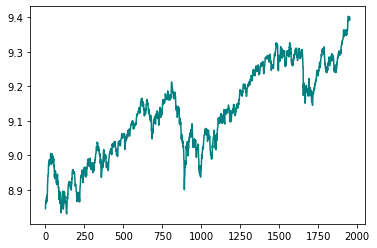

In [78]:
plt.plot(list(map(lambda x: log(x), df_2012_daily["<Close>"])), c = "teal")

In [11]:
df_2012_daily.loc["2017/06/30"] #1338

<Open>       10220.0
<High>       10263.0
<Low>        10196.0
<Close>      10252.0
<Volume>    122915.0
Name: 2017-06-30 00:00:00, dtype: float64

In [12]:
df_sample_1min = df_2012_1min[df_2012_1min["<Date>"] < "2017-07-01"]

In [13]:
df_sample_1min

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>
852619,2012-01-02,08:46:00,7022,7028,7011,7018,1156
852620,2012-01-02,08:47:00,7018,7019,7006,7008,682
852621,2012-01-02,08:48:00,7008,7010,7005,7008,522
852622,2012-01-02,08:49:00,7009,7019,7009,7015,366
852623,2012-01-02,08:50:00,7017,7017,7012,7012,267
...,...,...,...,...,...,...,...
1253314,2017-06-30,13:41:00,10251,10252,10250,10251,323
1253315,2017-06-30,13:42:00,10251,10252,10251,10251,166
1253316,2017-06-30,13:43:00,10251,10252,10251,10251,182
1253317,2017-06-30,13:44:00,10251,10253,10251,10253,773


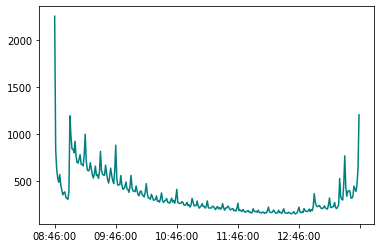

In [14]:
# 量能概況
meanVol = df_sample_1min.groupby("<Time>").mean()["<Volume>"]
stdVol = df_sample_1min.groupby("<Time>").std()["<Volume>"]
x = sorted(list(set(df_sample_1min["<Time>"])))
ticker_spacing = x
ticker_spacing = 60
fig, ax = plt.subplots(1,1)
ax.plot(x, meanVol, c = "teal")
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


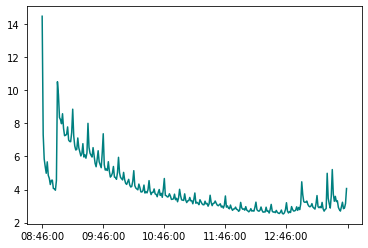

In [15]:
df_sample_1min["H-L"] = df_sample_1min["<High>"] - df_sample_1min["<Low>"]
meanVolatility = df_sample_1min.groupby("<Time>").mean()["H-L"]
stdVolatility = df_sample_1min.groupby("<Time>").std()["H-L"]
fig, ax = plt.subplots(1,1)
ax.plot(x, meanVolatility, c = "teal")
# ax.plot(x, meanVolatility + stdVolatility, c = "b")
# ax.plot(x, meanVolatility - stdVolatility, c = "b")
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
# 標準差部份可以做rolling

In [16]:
# Put call ratio
df_PCR = pd.read_csv("putCallRatio.txt", sep = ",", encoding = "utf-8", engine = "c", usecols = ["Date", "Close"])
df_PCR.columns = ["<Date>", "PCR"]
df_PCR

,<Date>,PCR
0,2012/1/2,81.42
1,2012/1/3,86.49
2,2012/1/4,92.31
3,2012/1/5,95.07
4,2012/1/6,97.77
...,...,...
1948,2019/12/25,122.63
1949,2019/12/26,123.62
1950,2019/12/27,138.47
1951,2019/12/30,129.88


In [17]:
# merge PCR data onto df_sample_daily
df_2012_daily.reset_index(inplace = True)
df_2012_daily.rename(columns = {"index": "<Date>"}, inplace = True)
df_sample_daily = df_2012_daily[df_2012_daily["<Date>"] < "2017-07-01"]
df_PCR["<Date>"] = pd.to_datetime(df_PCR["<Date>"])
df_sample_daily = pd.merge(df_sample_daily, df_PCR, how = "left", on = "<Date>")
# check 有無沒merge到的日期
if True in df_sample_daily["PCR"].isna().tolist():
    raise ValueError("Merge Error!")

In [18]:
df_sample_daily["Return"] = (df_sample_daily["<Close>"] - df_sample_daily["<Close>"].shift()) / df_sample_daily["<Close>"].shift()
df_sample_daily["PCR_change"] = (df_sample_daily["PCR"] - df_sample_daily["PCR"].shift()) / df_sample_daily["PCR"].shift()
df_sample_daily["PCR_change_1"] = df_sample_daily["PCR_change"].shift()

array([0.46503816])

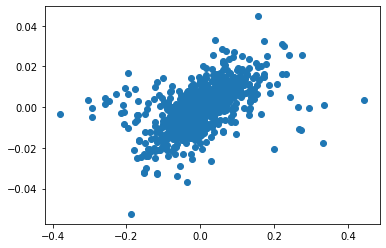

In [19]:
# t期對t期
plt.scatter(df_sample_daily["PCR_change"], df_sample_daily["Return"])
# 相關係數
np.correlate(df_sample_daily["PCR_change"][1::], df_sample_daily["Return"][1::])

array([0.05040332])

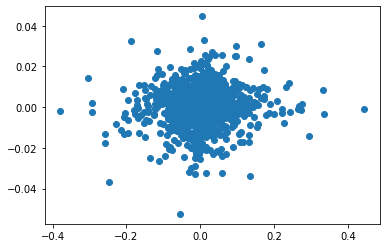

In [20]:
# t-1期對t期
plt.scatter(df_sample_daily["PCR_change_1"], df_sample_daily["Return"])
# 相關係數
np.correlate(df_sample_daily["PCR_change_1"][2::], df_sample_daily["Return"][2::])

#### 第二次策略報告

In [21]:
df_sample_1min = pd.merge(df_sample_1min, df_PCR, how = "left", on = "<Date>")
if True in df_sample_1min["PCR"].isna().tolist():
    raise ValueError("NA exists.")

這是初次沒做樣本區分時所做的，當作remind 2019-06-28有問題

In [22]:
daily_close = df_2012_1min.groupby("<Date>").tail(1)
daily_close[daily_close["<Time>"].isin(["13:30:00", "13:45:00"]) == False]

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>
1330522,2018-07-19,13:44:00,10721,10721,10720,10721,360
1398978,2019-06-28,12:26:00,10575,10576,10574,10576,88


In [23]:
# 把2019/06/28 12:26:00的收盤價改成當日收盤價10580(由期交所查詢，分K就不改了反正差不多，改daily_close)
# 2018/07/19這筆就以13:44:00的資料當作最終(查過，最後也收在10721)

In [24]:
daily_close.loc[546359, "<Close>"] = 10580
daily_close["t-1 close"] = daily_close["<Close>"].shift()
df_2012_1min = pd.merge(df_2012_1min, daily_close[["<Date>", "t-1 close"]], how = "left", on = "<Date>")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


繼續樣本內討論

In [22]:
daily_close = df_sample_1min.groupby("<Date>").tail(1)
daily_close["t-1 close"] = daily_close["<Close>"].shift()
df_sample_1min = pd.merge(df_sample_1min, daily_close[["<Date>", "t-1 close"]], how = "left", on = "<Date>")
df_sample_1min["min return"] = (df_sample_1min["<Close>"] - df_sample_1min["t-1 close"]) / df_sample_1min["t-1 close"]
df_sample_1min = pd.merge(df_sample_1min, df_sample_daily[["<Date>", "PCR_change_1"]], how = "left", on = "<Date>")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
daily_open = df_sample_1min.groupby("<Date>").head(1)
daily_open["t open"] = daily_open["<Open>"]
df_sample_1min = pd.merge(df_sample_1min, daily_open[["<Date>", "t open"]], how = "left", on = "<Date>")
df_sample_1min["min return(0846base)"] = (df_sample_1min["<Close>"] - df_sample_1min["t open"]) / df_sample_1min["t open"]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df_sample_1min

,<Date>,<Time>,<Open>,<High>,<Low>,<Close>,<Volume>,H-L,PCR,t-1 close,min return,PCR_change_1,t open,min return(0846base)
0,2012-01-02,08:46:00,7022,7028,7011,7018,1156,17,81.42,NaN,NaN,NaN,7022,-0.000570
1,2012-01-02,08:47:00,7018,7019,7006,7008,682,13,81.42,NaN,NaN,NaN,7022,-0.001994
2,2012-01-02,08:48:00,7008,7010,7005,7008,522,5,81.42,NaN,NaN,NaN,7022,-0.001994
3,2012-01-02,08:49:00,7009,7019,7009,7015,366,10,81.42,NaN,NaN,NaN,7022,-0.000997
4,2012-01-02,08:50:00,7017,7017,7012,7012,267,5,81.42,NaN,NaN,NaN,7022,-0.001424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400695,2017-06-30,13:41:00,10251,10252,10250,10251,323,2,112.97,10297.0,-0.004467,0.026035,10220,0.003033
400696,2017-06-30,13:42:00,10251,10252,10251,10251,166,1,112.97,10297.0,-0.004467,0.026035,10220,0.003033
400697,2017-06-30,13:43:00,10251,10252,10251,10251,182,1,112.97,10297.0,-0.004467,0.026035,10220,0.003033
400698,2017-06-30,13:44:00,10251,10253,10251,10253,773,2,112.97,10297.0,-0.004273,0.026035,10220,0.003229


In [42]:
intraday_everymin_max_return = df_sample_1min.groupby(["<Date>"]).max()["min return"]
intraday_everymin_min_return = df_sample_1min.groupby(["<Date>"]).min()["min return"]
intraday_everymin_max_return_2 = df_sample_1min.groupby(["<Date>"]).max()["min return(0846base)"]
intraday_everymin_min_return_2 = df_sample_1min.groupby(["<Date>"]).min()["min return(0846base)"]
intraday_everymin_mean_return_2 = df_sample_1min.groupby(["<Date>"]).mean()["min return(0846base)"]
condition = [df_sample_daily["PCR_change_1"] >= 0, df_sample_daily["PCR_change_1"] < 0]
choice = [intraday_everymin_max_return, intraday_everymin_min_return]
possible_return = np.select(condition, choice, default = np.nan)
choice_2 = [intraday_everymin_max_return_2, intraday_everymin_min_return_2]
possible_return_2 = np.select(condition, choice_2, default = np.nan)

In [26]:
# 找出換月的點
df_sample_daily["day"] = [i.day for i in df_sample_daily["<Date>"]]
df_sample_daily["weekday"] = [i.weekday() for i in df_sample_daily["<Date>"]]
possible_set = df_sample_daily[(df_sample_daily["day"] >= 15) & (df_sample_daily["day"] <= 21)]
# 要有66個換月點
# note: weekday從0開始代表禮拜一
print(len(possible_set[possible_set["weekday"] == 2])) # 代表有2天第三個禮拜三休假，依照交易所規定將順延到禮拜四做結算
possible_set[possible_set["weekday"] == 2]["<Date>"].tolist() #2013/08 & 2015/02
df_sample_daily[df_sample_daily["<Date>"].astype(str).str.startswith("2013-08")] #Q: 照理是2013/08/21結算，但資料沒有21這天？
# 2013/08暫時用22號當結算日，2015/02結算日為2015/02/24!!!!!
df_sample_daily.loc[(df_sample_daily["day"] >= 15) & (df_sample_daily["day"] <= 21) & (df_sample_daily["weekday"] == 2), "結算"] = "True"
df_sample_daily.loc[df_sample_daily["<Date>"].isin(["2012-08-22", "2015-02-24"]), "結算"] = "True"
df_sample_daily

64


,<Date>,<Open>,<High>,<Low>,<Close>,<Volume>,PCR,Return,PCR_change,PCR_change_1,day,weekday,結算
0,2012-01-02,7022.0,7051.0,6928.0,6949.0,88074,81.42,NaN,NaN,NaN,2,0,NaN
1,2012-01-03,7020.0,7087.0,7002.0,7049.0,86594,86.49,0.014391,0.062270,NaN,3,1,NaN
2,2012-01-04,7084.0,7109.0,7043.0,7073.0,87250,92.31,0.003405,0.067291,0.062270,4,2,NaN
3,2012-01-05,7088.0,7124.0,7061.0,7119.0,81890,95.07,0.006504,0.029899,0.067291,5,3,NaN
4,2012-01-06,7100.0,7117.0,7060.0,7085.0,90243,97.77,-0.004776,0.028400,0.029899,6,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,2017-06-26,10207.0,10395.0,10202.0,10381.0,187610,155.60,0.016251,0.126067,0.039025,26,0,NaN
1335,2017-06-27,10390.0,10412.0,10353.0,10368.0,113890,142.09,-0.001252,-0.086825,0.126067,27,1,NaN
1336,2017-06-28,10303.0,10342.0,10247.0,10261.0,160225,114.46,-0.010320,-0.194454,-0.086825,28,2,NaN
1337,2017-06-29,10325.0,10356.0,10260.0,10297.0,129216,117.44,0.003508,0.026035,-0.194454,29,3,NaN


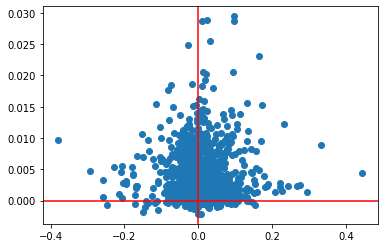

In [91]:
# t-1期PCR 對 t期每根一分K相較前日收盤return 的關係圖
condition_1 = df_sample_daily["PCR"].shift() > 100
# plt.scatter(df_sample_daily["PCR_change_1"][condition], possible_return[condition])
# np.correlate(df_sample_daily["PCR_change_1"][condition], possible_return[condition])
plt.scatter(df_sample_daily["PCR_change_1"][condition_1], np.array(intraday_everymin_max_return_2)[condition_1])
plt.axhline(0, c = "r")
plt.axvline(0, c = "r")

In [69]:
# 由上來看，做當沖比較難，直覺上行情不可能隔天就發動，大戶賣賣權也是要抱一段時間才有辦法賺權利金(時間價值)
# 考慮PCR均線來判斷是否有突破現象
df_sample_daily["PCR_MA5"] = df_sample_daily["PCR"].rolling(5).mean()
df_sample_daily["PCR_MA10"] = df_sample_daily["PCR"].rolling(10).mean()
df_sample_daily["PCR_MAcross"] = df_sample_daily["PCR_MA5"] > df_sample_daily["PCR_MA10"]

In [70]:
df_sample_daily[df_sample_daily["PCR_MAcross"] == True]

,<Date>,<Open>,<High>,<Low>,<Close>,<Volume>,PCR,Return,PCR_change,PCR_change_1,day,weekday,結算,PCR_MA5,PCR_MA10,PCR_MAcross
9,2012-01-13,7235.0,7263.0,7147.0,7165.0,93802,103.54,-0.002784,-0.004710,0.001637,13,4,NaN,102.940,96.776,True
10,2012-01-16,7236.0,7280.0,7071.0,7093.0,133403,100.75,-0.010049,-0.026946,-0.004710,16,0,NaN,103.304,98.709,True
11,2012-01-17,7152.0,7228.0,7118.0,7227.0,100542,104.09,0.018892,0.033151,-0.026946,17,1,NaN,103.254,100.469,True
12,2012-01-18,7224.0,7248.0,7192.0,7207.0,52778,105.47,-0.002767,0.013258,0.033151,18,2,True,103.576,101.785,True
13,2012-01-30,7352.0,7448.0,7351.0,7390.0,87983,108.99,0.025392,0.033374,0.013258,30,0,NaN,104.568,103.177,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,2017-06-22,10198.0,10234.0,10174.0,10231.0,116301,132.99,-0.013309,0.095921,-0.258705,22,3,NaN,139.016,131.220,True
1333,2017-06-23,10221.0,10245.0,10193.0,10215.0,100716,138.18,-0.001564,0.039025,0.095921,23,4,NaN,140.154,131.094,True
1334,2017-06-26,10207.0,10395.0,10202.0,10381.0,187610,155.60,0.016251,0.126067,0.039025,26,0,NaN,142.364,134.423,True
1335,2017-06-27,10390.0,10412.0,10353.0,10368.0,113890,142.09,-0.001252,-0.086825,0.126067,27,1,NaN,138.042,136.590,True


In [77]:
np.corrcoef(df_sample_daily["PCR"].shift()[1::], df_sample_daily["<Close>"][1::])

array([[1.        , 0.40862625],
       [0.40862625, 1.        ]])

In [66]:
# 尋找創max or min return的K棒數
K_number_list = []
date_list = sorted(list(set(df_2012_daily["<Date>"])))
for i, j in enumerate(date_list):
    if i > 1:
        K_number_list.append(df_2012_1min[df_2012_1min["<Date>"] == j]["min return"].tolist().index(possible_return[i]))

In [76]:
pd.Series(K_number_list).describe()

count    1951.000000
mean      107.140441
std       101.189048
min         0.000000
25%        22.000000
50%        67.000000
75%       194.000000
max       299.000000
dtype: float64

In [21]:
df_foreign_chips = pd.read_csv("Chips.txt", sep = ",", encoding = "utf-8", engine = "c")

In [22]:
df_foreign_chips["<Date>"] = pd.to_datetime(df_foreign_chips["<Date>"])
df_2012_daily = pd.merge(df_2012_daily, df_foreign_chips, how = "left", on = "<Date>")

In [23]:
df_2012_daily[df_2012_daily["多空未平倉口數淨額"].isna()] # 之後再去資料庫check一次

,<Date>,<Open>,<High>,<Low>,<Close>,<Volume>,PCR,Return,PCR_change,PCR_change_1,多空交易口數淨額,多空未平倉口數淨額
1239,2017-02-02,9500.0,9510.0,9373.0,9375.0,137809,109.28,-0.007516,-0.176426,0.010048,NaN,NaN
1240,2017-02-03,9418.0,9458.0,9408.0,9439.0,94742,115.51,0.006827,0.057010,-0.176426,NaN,NaN
1241,2017-02-06,9477.0,9533.0,9441.0,9505.0,116683,137.28,0.006992,0.188469,0.057010,NaN,NaN
1242,2017-02-07,9499.0,9525.0,9482.0,9520.0,70124,144.19,0.001578,0.050335,0.188469,NaN,NaN


In [23]:
df_2012_daily[df_2012_daily["PCR_change"] == df_2012_daily["PCR_change"].min()]

,<Date>,<Open>,<High>,<Low>,<Close>,<Volume>,PCR,Return,PCR_change
1110,2016-07-20,9010.0,9042.0,8972.0,9003.0,92080,113.83,-0.003321,-0.379943


In [26]:
df_2012_daily.iloc[1101:1120, :]

,<Date>,<Open>,<High>,<Low>,<Close>,<Volume>,PCR,Return,PCR_change
1101,2016-07-06,8552.0,8559.0,8443.0,8468.0,165720,137.35,-0.016378,-0.165604
1102,2016-07-07,8508.0,8571.0,8505.0,8562.0,98460,147.07,0.011101,0.070768
1103,2016-07-11,8683.0,8748.0,8677.0,8736.0,119642,171.36,0.020322,0.165159
1104,2016-07-12,8751.0,8795.0,8736.0,8777.0,104943,184.68,0.004693,0.077731
1105,2016-07-13,8825.0,8837.0,8726.0,8793.0,146721,168.32,0.001823,-0.088586
1106,2016-07-14,8800.0,8841.0,8769.0,8813.0,110717,171.50,0.002275,0.018893
1107,2016-07-15,8846.0,8925.0,8823.0,8911.0,129586,186.89,0.011120,0.089738
1108,2016-07-18,8918.0,9001.0,8912.0,8998.0,104668,194.20,0.009763,0.039114
1109,2016-07-19,9020.0,9035.0,8962.0,9033.0,112870,183.58,0.003890,-0.054686
1110,2016-07-20,9010.0,9042.0,8972.0,9003.0,92080,113.83,-0.003321,-0.379943


In [ ]:
# 夜盤開始施行時間
# 換月
# 掉報價問題
# 2001開始8:45開盤